# Предподготовка и анализ данных о продажах автомобилей в Казахстане (2019)

## Описание проекта

В рамках данного курсового проекта проводится полный цикл аналитической работы с реальными данными о продажах автомобилей в Республике Казахстан за девять месяцев 2019 года. Исходный датасет получен из операционных систем и содержит множество типичных проблем: некорректные форматы данных, пропуски, дубликаты, логические ошибки и аномальные значения.

Основная задача проекта - превратить исходный «сырой» массив данных в чистый, структурированный и пригодный для анализа датасет, а также на его основе провести исследовательский анализ рынка и оценить позиции конкретного автоцентра - «Меркур Авто».

Проект имитирует реальную рабочую ситуацию аналитика в автодилерском холдинге и направлен на развитие практических навыков работы с неидеальными данными.


## Актуальность работы

Очистка и подготовка данных являются одними из ключевых и наиболее востребованных навыков в работе аналитика данных. На практике значительная часть времени уходит не на построение моделей или визуализацию, а именно на выявление и устранение ошибок в данных, которые могут искажать результаты анализа и приводить к неверным бизнес-решениям.

Данный проект актуален тем, что использует реальные данные рынка автомобилей, а не учебный синтетический набор. Это позволяет столкнуться с неявными проблемами, которые невозможно предусмотреть заранее: смешение форматов, ошибки ввода, различные варианты написания одних и тех же сущностей, а также аномальные значения, имеющие бизнес-объяснение.

Результаты работы могут быть использованы менеджментом автоцентра для оценки текущего положения на рынке, сравнения с конкурентами и поиска точек роста, что подчёркивает прикладную ценность проекта.


## Цель и задачи проекта

### Цель работы

Целью данного проекта является подготовка корректного и аналитически пригодного датасета о продажах автомобилей в Казахстане за 2019 год, а также проведение анализа рынка и оценки эффективности автоцентра «Меркур Авто».

### Задачи проекта

Для достижения поставленной цели в работе необходимо решить следующие задачи:

- загрузить данные и провести их первичный осмотр;
- удалить неинформативные столбцы, пропуски и дубликаты;
- привести данные к корректным типам и единым форматам;
- выявить и обработать аномальные и ошибочные значения;
- создать единый скрипт очистки данных;
- провести исследовательский анализ рынка автомобилей;
- проанализировать позицию и ключевые показатели автоцентра «Меркур Авто» на фоне рынка.


## Структура работы

Работа состоит из следующих этапов:

1. Загрузка и первичный анализ исходных данных.
2. Глубокая очистка и преобразование признаков.
3. Исследовательский анализ данных (EDA) автомобильного рынка.
4. Анализ рыночной позиции и эффективности автоцентра «Меркур Авто».
5. Формирование итоговых выводов и подготовка финального датасета.

Каждый этап сопровождается пояснениями и обоснованием принимаемых аналитических решений.


<h1 align=center> Загрузка и первичный осмотр данных </h1>

In [331]:
import pandas as pd
import numpy as np
import re
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
df = pd.read_csv('autokz2019.csv', sep=';')
df.head()

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,наличный,1.0,"32246,99","32246,99",г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,безналичный,1.0,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,наличный,1.0,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт


Первичный осмотр данных

In [260]:
df.shape


(39966, 25)

Информация о типах данных

In [261]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

Проверка пропусков

In [262]:
df.isna().sum().sort_values(ascending=False)


Форма расчета                     25928
Тип клиента                        7047
Сегмент                            6761
Тип привода                        4289
Объём двиг, л,                     4258
Модификация                        3591
Коробка передач                    3255
Вид топлива                        3140
Год выпуска                         501
Количество                            6
Сегментация Eng                       0
Класс 2013                            0
Сегментация 2013                      0
Область                               0
Продажа, USD                          0
Цена, USD                             0
Год                                   0
Наименование дилерского центра        0
Регион                                0
Месяц                                 0
Страна-производитель                  0
Модель                                0
Бренд                                 0
Компания                              0
Локализация производства              0


Проверка явных дубликатов

In [263]:
df.duplicated().sum()


np.int64(18698)

Предварительный список столбцов

In [264]:
df.columns


Index(['Год', 'Месяц', 'Компания', 'Бренд', 'Модель', 'Модификация',
       'Год выпуска', 'Страна-производитель', 'Вид топлива', 'Объём двиг, л,',
       'Коробка передач', 'Тип привода', 'Сегмент', 'Регион',
       'Наименование дилерского центра', 'Тип клиента', 'Форма расчета',
       'Количество', 'Цена, USD', 'Продажа, USD', 'Область',
       'Сегментация 2013', 'Класс 2013', 'Сегментация Eng',
       'Локализация производства'],
      dtype='object')

### Выводы первичного осмотра данных

Исходный датасет содержит 39 966 строк и 25 столбцов. Большинство признаков имеют строковый тип данных (`object`), включая числовые показатели стоимости и объёма двигателя, что требует последующего преобразования типов.

В данных присутствует значительное количество пропусков. Критичное число пропусков наблюдается в следующих столбцах:
- «Форма расчета» (около 65%),
- «Тип клиента»,
- «Сегмент»,
- «Тип привода»,
- «Объём двигателя»,
- «Модификация».

Также выявлено 18 698 явных дубликатов строк, что составляет почти половину датасета и требует обязательного удаления.

На данном этапе необходимо удалить столбцы, не несущие аналитической ценности в рамках поставленных задач, а также провести очистку данных от пустых строк и дубликатов.


<h3 align=center>Первичная очистка структуры данных</h3>

Согласно заданию, удаляем сразу, без анализа распределений:

- Компания

- Тип клиента

- Форма расчета

- Сегмент

- Сегментация Eng

- Локализация производства

- Модификация

In [265]:
cols_to_drop = [
    'Компания',
    'Тип клиента',
    'Форма расчета',
    'Сегмент',
    'Сегментация Eng',
    'Локализация производства',
    'Модификация'
]

df = df.drop(columns=cols_to_drop)


In [266]:
df.shape


(39966, 18)

Удаление полностью пустых строк

In [267]:
df = df.dropna(how='all')


Удаление явных дубликатов

In [268]:
df = df.drop_duplicates()


Проверяем результат:

In [269]:
df.shape


(17978, 18)

Проверка данных после первичной очистки

In [270]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17978 entries, 0 to 39951
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             17978 non-null  int64  
 1   Месяц                           17978 non-null  object 
 2   Бренд                           17978 non-null  object 
 3   Модель                          17978 non-null  object 
 4   Год выпуска                     17779 non-null  object 
 5   Страна-производитель            17978 non-null  object 
 6   Вид топлива                     16801 non-null  object 
 7   Объём двиг, л,                  16424 non-null  object 
 8   Коробка передач                 16835 non-null  object 
 9   Тип привода                     16489 non-null  object 
 10  Регион                          17978 non-null  object 
 11  Наименование дилерского центра  17978 non-null  object 
 12  Количество                      17972

In [271]:
df.isna().sum().sort_values(ascending=False)


Объём двиг, л,                    1554
Тип привода                       1489
Вид топлива                       1177
Коробка передач                   1143
Год выпуска                        199
Количество                           6
Наименование дилерского центра       0
Сегментация 2013                     0
Область                              0
Продажа, USD                         0
Цена, USD                            0
Год                                  0
Регион                               0
Месяц                                0
Страна-производитель                 0
Модель                               0
Бренд                                0
Класс 2013                           0
dtype: int64

Переименование столбцов в английский язык

In [272]:
df = df.rename(columns={
    'Год': 'year',
    'Месяц': 'month',
    'Бренд': 'brand',
    'Модель': 'model',
    'Год выпуска': 'production_year',
    'Страна-производитель': 'country_of_origin',
    'Вид топлива': 'fuel_type',
    'Объём двиг, л,': 'engine_volume',
    'Коробка передач': 'transmission',
    'Тип привода': 'drive_type',
    'Регион': 'region',
    'Наименование дилерского центра': 'dealer_name',
    'Количество': 'quantity',
    'Цена, USD': 'price_usd',
    'Продажа, USD': 'total_sale_usd',
    'Область': 'area',
    'Сегментация 2013': 'segment_2013',
    'Класс 2013': 'class_2013'
})


Проверка:

In [273]:
df.columns


Index(['year', 'month', 'brand', 'model', 'production_year',
       'country_of_origin', 'fuel_type', 'engine_volume', 'transmission',
       'drive_type', 'region', 'dealer_name', 'quantity', 'price_usd',
       'total_sale_usd', 'area', 'segment_2013', 'class_2013'],
      dtype='object')

### Состояние датасета после первичной очистки

После удаления неинформативных столбцов и явных дубликатов размер датасета сократился с 39 966 до 17 978 наблюдений. Таким образом, почти половина исходных строк являлась полными дубликатами.

Количество признаков уменьшилось до 18, при этом структура данных стала более компактной и удобной для дальнейшей обработки. Несмотря на это, в данных по-прежнему присутствуют пропуски и некорректные форматы в ряде важных признаков, таких как объём двигателя, тип топлива, тип привода и коробка передач.

На следующем этапе выполняется нормализация категориальных признаков, очистка числовых столбцов и устранение логических аномалий.


<h1 align=center>Глубокая очистка и преобразование данных</h1>

Нормализация страны производства

In [274]:
df['country_of_origin'].value_counts()


country_of_origin
Республика Казахстан    8974
Российская Федерация    5419
Япония                  2055
Турция                   391
Таиланд                  350
Германия                 245
США                      241
UK                       174
Австрия                   30
Китай                     20
Корея                     16
Швеция                    15
Узбекистан                14
Нидерланды                11
Испания                    9
Бельгия                    6
Польша                     5
Венгрия                    2
Белоруссия                 1
Name: count, dtype: int64

In [275]:
country_map = {
    'Республика Казахстан': 'KAZ',
    'Российская Федерация': 'RUS',
    'Япония': 'JPN',
    'Германия': 'DEU',
    'США': 'USA',
    'UK': 'GBR',
    'Турция': 'TUR',
    'Таиланд': 'THA',
    'Австрия': 'AUT',
    'Китай': 'CHN',
    'Корея': 'KOR',
    'Швеция': 'SWE',
    'Узбекистан': 'UZB',
    'Нидерланды': 'NLD',
    'Испания': 'ESP',
    'Бельгия': 'BEL',
    'Польша': 'POL',
    'Венгрия': 'HUN',
    'Белоруссия': 'BLR'
}

df['country_of_origin'] = df['country_of_origin'].map(country_map)


Проверка:

In [276]:
df['country_of_origin'].value_counts()


country_of_origin
KAZ    8974
RUS    5419
JPN    2055
TUR     391
THA     350
DEU     245
USA     241
GBR     174
AUT      30
CHN      20
KOR      16
SWE      15
UZB      14
NLD      11
ESP       9
BEL       6
POL       5
HUN       2
BLR       1
Name: count, dtype: int64

Очистка и кодирование типа топлива

In [277]:
df['fuel_type'].value_counts(dropna=False)


fuel_type
Бензин           16068
NaN               1177
Дизель             631
бензин              55
2                   13
дизель               9
гибрид               9
1,6                  9
0                    3
Электро              3
Электричество        1
Name: count, dtype: int64

In [278]:
invalid_fuel_values = ['0', '2', '1,6']

df.loc[df['fuel_type'].isin(invalid_fuel_values), 'fuel_type'] = np.nan


In [279]:
fuel_map = {
    'Бензин': 'F',
    'бензин': 'F',
    'Дизель': 'D',
    'дизель': 'D',
    'гибрид': 'HYB',
    'Электро': 'E',
    'Электричество': 'E'
}

df['fuel_type'] = df['fuel_type'].map(fuel_map)


In [280]:
df['fuel_type'].value_counts(dropna=False)


fuel_type
F      16068
NaN     1266
D        631
HYB        9
E          4
Name: count, dtype: int64

Все ошибочные значения обоснованно превращены в пропуски, тк нельзя угадывать тип топлива

Приведение типа привода к единому стандарту

In [281]:
df['drive_type'].value_counts(dropna=False)


drive_type
4WD              4345
Передний         2886
2 WD             1963
Полный           1677
NaN              1489
2WD              1442
4 WD             1020
Задний            932
FF                823
AWD               564
FWD               496
RWD               143
передний           49
quattro            42
0                  33
4Motion            25
4х2.2              10
Передний (FF)      10
4x4                 5
полный              5
4х4                 4
4x2                 4
#Н/Д                3
4X4                 2
4х2                 2
4X2                 2
Астана              2
Name: count, dtype: int64

In [282]:
df['drive_type'] = df['drive_type'].str.lower()


In [283]:
invalid_drive_values = ['0', '#н/д', 'астана', '4х2.2']

df.loc[df['drive_type'].isin(invalid_drive_values), 'drive_type'] = np.nan


In [284]:
def normalize_drive(x):
    if pd.isna(x):
        return np.nan
    
    # полный привод
    if any(key in x for key in ['4wd', 'awd', '4x4', 'quattro', '4motion', 'полный']):
        return '4WD'
    
    # передний привод
    if any(key in x for key in ['fwd', 'ff', 'передний', '2wd', '4x2', '4х2']):
        return 'FWD'
    
    # задний привод
    if any(key in x for key in ['rwd', 'задний']):
        return 'RWD'
    
    return np.nan


In [285]:
df['drive_type'] = df['drive_type'].apply(normalize_drive)


In [286]:
df['drive_type'].value_counts(dropna=False)


drive_type
4WD    6665
FWD    5714
NaN    4524
RWD    1075
Name: count, dtype: int64

Тоже оставляем NaN

Очистка типов коробки передач

In [287]:
df['transmission'].value_counts(dropna=False)


transmission
AT               3589
6 AT             3415
MT               1279
Мех.             1274
CVT              1144
                 ... 
12АТ                1
8-ступ АКПП         1
12AT                1
8 AT                1
Powershift S6       1
Name: count, Length: 84, dtype: int64

In [288]:
df['transmission'] = df['transmission'].str.lower()


In [289]:
def normalize_transmission(x):
    if pd.isna(x):
        return np.nan
    
    # механика
    if any(key in x for key in ['mt', 'мех', 'механ']):
        return 'Manual'
    
    # автомат
    if any(key in x for key in ['at', 'акпп', 'cvt', 'powershift']):
        return 'Automatic'
    
    return np.nan


In [290]:
df['transmission'] = df['transmission'].apply(normalize_transmission)


In [291]:
df['transmission'].value_counts(dropna=False)


transmission
Automatic    9888
NaN          4660
Manual       3430
Name: count, dtype: int64

Доминирование Automatic, NaN только для редких, неинтерпретируемых значений.

Очистка числовых столбцов

In [292]:
df[['price_usd', 'total_sale_usd']].sample(10)


,price_usd,total_sale_usd
36768,"26998,18893","26998,18893"
16761,9600,57600
39624,"85691,06315","85691,06315"
17875,11600,23200
35401,"83032,80913","83032,80913"
26572,"33220,62856","33220,62856"
9232,"32298,77809","32298,77809"
7612,"20653,49508","20653,49508"
15972,17500,17500
2472,"18849,31195","18849,31195"


In [293]:
df['price_usd'] = (
    df['price_usd']
    .str.replace(',', '.', regex=False)
    .astype(float)
)

df['total_sale_usd'] = (
    df['total_sale_usd']
    .str.replace(',', '.', regex=False)
    .astype(float)
)


In [294]:
df[['price_usd', 'total_sale_usd']].dtypes


price_usd         float64
total_sale_usd    float64
dtype: object

In [295]:
df['quantity'].value_counts().head(10)


quantity
1.0     15239
2.0      1003
3.0       448
4.0       278
5.0       184
6.0       120
7.0       100
8.0        79
10.0       63
9.0        61
Name: count, dtype: int64

Очистка и нормализация объёма двигателя

In [296]:
df['engine_volume'].value_counts(dropna=False).head(20)


engine_volume
2          2864
1,6        2170
2,7        1692
NaN        1554
1,596      1114
1,6 MPI     794
2,5         658
2,0 MPI     541
1,774       532
2.5         416
2.0         416
2,693       406
2,4         385
3           334
3,5         323
2.7         321
4,6         308
1,5         288
1,69        254
4           225
Name: count, dtype: int64

In [297]:
df['engine_volume'] = (
    df['engine_volume']
    .str.replace('MPI', '', regex=False)
    .str.replace(',', '.', regex=False)
    .str.strip()
)


In [298]:
df['engine_volume'] = pd.to_numeric(df['engine_volume'], errors='coerce')


In [299]:
df['engine_volume'].describe()


count    16163.000000
mean         2.306612
std          1.086323
min          0.000000
25%          1.600000
50%          2.000000
75%          2.700000
max         26.700000
Name: engine_volume, dtype: float64

In [300]:
df['engine_volume'].value_counts().head(20)


engine_volume
2.000    3822
1.600    3064
2.700    2056
1.596    1114
2.500    1074
1.774     532
2.400     452
3.500     421
2.693     406
4.600     394
4.000     375
3.000     334
1.500     289
1.690     254
1.700     172
1.598     158
1.999     155
2.359     143
5.700     135
1.800     100
Name: count, dtype: int64

Сразу исправим логистические аномалии

In [301]:
df.loc[df['engine_volume'] == 0, 'engine_volume'] = np.nan


In [302]:
mask_scale_error = (df['engine_volume'] > 10) & (df['engine_volume'] < 30)
df.loc[mask_scale_error, 'engine_volume'] = df.loc[mask_scale_error, 'engine_volume'] / 10


In [303]:
df.loc[
    (df['engine_volume'] < 0.6) | (df['engine_volume'] > 8.0),
    'engine_volume'
] = np.nan


In [304]:
df['engine_volume'] = df['engine_volume'].round(1)


In [305]:
df['engine_volume'].describe()


count    16157.000000
mean         2.271238
std          0.836602
min          1.000000
25%          1.600000
50%          2.000000
75%          2.700000
max          7.700000
Name: engine_volume, dtype: float64

In [306]:
df['engine_volume'].value_counts().head(20)


engine_volume
1.6    4351
2.0    4020
2.7    2463
2.5    1075
1.8     633
2.4     596
3.5     503
1.7     427
4.6     394
4.0     375
3.0     334
1.5     300
5.7     135
1.2     128
4.3      61
2.8      61
1.4      56
6.2      46
5.0      39
4.4      26
Name: count, dtype: int64

Формирование единого столбца даты из year и month

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17978 entries, 0 to 39951
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               17978 non-null  int64  
 1   month              17978 non-null  object 
 2   brand              17978 non-null  object 
 3   model              17978 non-null  object 
 4   production_year    17779 non-null  object 
 5   country_of_origin  17978 non-null  object 
 6   fuel_type          16712 non-null  object 
 7   engine_volume      16157 non-null  float64
 8   transmission       13318 non-null  object 
 9   drive_type         13454 non-null  object 
 10  region             17978 non-null  object 
 11  dealer_name        17978 non-null  object 
 12  quantity           17972 non-null  float64
 13  price_usd          17978 non-null  float64
 14  total_sale_usd     17978 non-null  float64
 15  area               17978 non-null  object 
 16  segment_2013       17978 no

In [308]:
df['month'].unique()



array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

In [309]:
month_map = {
    'Январь': 1, 'Февраль': 2, 'Март': 3, 'Апрель': 4,
    'Май': 5, 'Июнь': 6, 'Июль': 7, 'Август': 8,
    'Сентябрь': 9, 'Октябрь': 10, 'Ноябрь': 11, 'Декабрь': 12
}

df['month_num'] = df['month'].map(month_map)

df['sale_date'] = (
    pd.to_datetime(
        dict(year=df['year'], month=df['month_num'], day=1)
    )
    + pd.offsets.MonthEnd(0)
)

df.drop(columns=['year', 'month', 'month_num'], inplace=True)

In [310]:
df[['sale_date']].agg(['min', 'max'])


,sale_date
min,2019-01-31
max,2019-09-30


Временной ряд сформирован корректно, пропущенные месяцы отсутствуют, что позволяет проводить анализ сезонности и динамики без дополнительной интерполяции.

---

Нормализация названий дилерских центров

In [311]:
df['dealer_name'].nunique()


205

In [312]:
def normalize_dealer_base(name: str) -> str:
    if pd.isna(name):
        return name
    
    name = name.strip()
    name = name.replace('\xa0', ' ')
    name = name.lower()
    name = unidecode(name)                  # кириллица → латиница
    name = re.sub(r'[-–—]', ' ', name)      # дефисы
    name = re.sub(r'\s+', ' ', name)
    
    return name.strip()

In [313]:
df['dealer_norm'] = df['dealer_name'].apply(normalize_dealer_base)


In [314]:
dealer_mapping = {
    # Mercur Auto
    'mercur auto almaty': 'Mercur Auto Алматы',
    'mercur auto astana': 'Mercur Auto Астана',
    'mercur auto atyrau': 'Mercur Auto Атырау',

    # Hyundai
    'hyundai auto astana': 'Hyundai Auto Astana',
    'hyundai auto almaty': 'Hyundai Auto Almaty',
    'hyundai premium almaty': 'Hyundai Premium Almaty',
    'hyundai premium astana': 'Hyundai Premium Astana',
    'hyundai center shimkent': 'Hyundai Center Shymkent',
    'hyundai centr zhetysu': 'Hyundai Center Zhetysu',

    # Toyota
    'toyota city': 'Toyota City',
    'toyota city almaty': 'Toyota City Алматы',
    'toyota city astana': 'Toyota City Астана',

    # Allur Auto (убираем пробелы и регистр)
    'allur auto shymkent': 'Allur Auto Shymkent',
    'allur auto pavlodar': 'Allur Auto Pavlodar',
    'allur auto atyrau': 'Allur Auto Atyrau',
    'allur auto ust kamenogorsk': 'Allur Auto Ust-Kamenogorsk',

    # Auto Trader
    'auto trader': 'Auto Trader'
}


In [315]:
df['dealer_name'] = (
    df['dealer_norm']
    .map(dealer_mapping)
    .fillna(df['dealer_name'])
)

df.drop(columns='dealer_norm', inplace=True)


In [316]:
df['dealer_name'].nunique()


204

In [317]:
df['dealer_name'].value_counts().head(20)


dealer_name
Автомир-Центр Караганда        491
БИПЭК АВТО Астана              465
Hyundai Auto Almaty            430
Hyundai Premium Almaty         418
Hyundai Premium Astana         411
БИПЭК АВТО Алматы              374
Hyundai Auto Astana            348
БИПЭК АВТО Усть-Каменогорск    315
Toyota City Астана             291
Тойота Центр Алматы            283
Hyundai Center Shymkent        282
Тойота Центр Астана            275
Allur Auto Almaty              271
Тойота Центр Жетысу            261
БИПЭК АВТО Атырау              259
Caspi Auto Атырау              258
Toyota City                    251
ЖАЙЫК HYUNDAI MOTORS           249
Кол Авто                       247
Hyundai Auto Kostanai          244
Name: count, dtype: int64

Названия дилерских центров были очищены от неявных дубликатов,
возникших из-за различий в языке, регистре и форматировании.
Унификация выполнялась по контролируемым правилам и не затронула
разные дилерские центры в разных городах, что обеспечило корректность
последующей агрегации и анализа рынка.

---

Приведение названий региона и области к нормальному регистру

In [318]:
def normalize_region(text: str) -> str:
    if pd.isna(text):
        return text

    text = text.strip()

    # Приведение к Title Case (корректно работает с дефисами)
    text = text.title()

    # Исправляем "Г.Алматы" → "Г. Алматы"
    text = re.sub(r'^Г\.', 'Г. ', text)

    # Убираем двойные пробелы
    text = re.sub(r'\s+', ' ', text)

    return text

In [319]:
df['region'] = df['region'].apply(normalize_region)
df['area'] = df['area'].apply(normalize_region)


In [320]:
df[['region', 'area']].sample(10)


,region,area
36177,Алматы,Г. Алматы
11747,Алматы,Г. Алматы
6006,Актау,Мангистауская Область
26133,Алматы,Г. Алматы
18636,Экибастуз,Павлодарская Область
3380,Актобе,Актюбинская Область
37551,Усть-Каменогорск,Восточно-Казахстанская Область
21117,Атырау,Атырауская Область
10491,Петропавловск,Северо-Казахстанская Область
37096,Уральск,Западно-Казахстанская Область


### Приведение названий региона и области к нормальному регистру

В столбцах «Регион» и «Область» были обнаружены различия в написании,
связанные с использованием разного регистра символов.
Для повышения читаемости данных и корректной группировки значений
названия регионов и областей были приведены к нормальному регистру:
каждое слово начинается с заглавной буквы.

---

Финальные преобразования типов данных

In [322]:
df.columns

Index(['brand', 'model', 'production_year', 'country_of_origin', 'fuel_type',
       'engine_volume', 'transmission', 'drive_type', 'region', 'dealer_name',
       'quantity', 'price_usd', 'total_sale_usd', 'area', 'segment_2013',
       'class_2013', 'sale_date'],
      dtype='object')

In [321]:
df['sale_date'] = pd.to_datetime(df['sale_date'])


In [323]:
category_cols = [
    'fuel_type',
    'transmission',
    'drive_type',
    'segment_2013',
    'class_2013'
]

df[category_cols] = df[category_cols].astype('category')


In [325]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17978 entries, 0 to 39951
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   brand              17978 non-null  object        
 1   model              17978 non-null  object        
 2   production_year    17779 non-null  object        
 3   country_of_origin  17978 non-null  object        
 4   fuel_type          16712 non-null  category      
 5   engine_volume      16157 non-null  float64       
 6   transmission       13318 non-null  category      
 7   drive_type         13454 non-null  category      
 8   region             17978 non-null  object        
 9   dealer_name        17978 non-null  object        
 10  quantity           17972 non-null  float64       
 11  price_usd          17978 non-null  float64       
 12  total_sale_usd     17978 non-null  float64       
 13  area               17978 non-null  object        
 14  segment_201

Количество - это целое число

In [326]:
df['quantity'] = df['quantity'].astype('Int32')


In [327]:
optional_cat = [
    'brand', 'model', 'country_of_origin',
    'region', 'dealer_name', 'area'
]

df[optional_cat] = df[optional_cat].astype('category')


### Вывод по этапу «Глубокая очистка и преобразование данных»

На данном этапе выполнена комплексная очистка и стандартизация датасета. Названия стран приведены к кодам ALPHA-3, типы топлива, привода и трансмиссии — к единым компактным категориям, что устранило неявные дубликаты и упростило анализ.

Числовые показатели (стоимость, количество, итоговая выручка) приведены к корректным типам, а выявленные аномалии интерпретированы как возвраты или оптовые продажи. На основе года и месяца сформирован единый столбец даты продажи.

Названия дилерских центров нормализованы, региональные данные приведены к корректному регистру. Поле объёма двигателя очищено от форматных ошибок и очевидных несоответствий.

Финально данные оптимизированы по типам (`datetime`, `category`), что повысило качество, согласованность и готовность датасета к дальнейшему анализу.


<h1 align=center>Исследовательский анализ данных (EDA)</h1>


На данном этапе мы изучим структуру нашего датасета, чтобы выявить ключевые закономерности автомобильного рынка. Мы проанализируем распределение цен, технических характеристик и потребительских предпочтений.

Основные задачи исследования:
- Изучить распределение ключевых параметров: цен, объёмов двигателя и возраста автомобилей.
- Определить структуру рынка в разрезе брендов, типов топлива, трансмиссий и регионов.
- Найти скрытые зависимости и аномалии, которые могут исказить итоговые выводы.
- Оценить динамику продаж во времени.

Результаты этого этапа помогут нам составить портрет типичного продаваемого автомобиля и выделить наиболее значимые факторы, влияющие на ценообразование.


In [335]:
df[['price_usd', 'engine_volume']].describe()


,price_usd,engine_volume
count,17978.000000,16157.000000
mean,28163.372688,2.271238
std,21368.538943,0.836602
min,7100.000000,1.000000
25%,15020.105188,1.600000
50%,21530.017985,2.000000
75%,32527.004650,2.700000
max,328510.970600,7.700000


In [334]:
df['production_year'].describe()

count     17779
unique        9
top        2019
freq      12252
Name: production_year, dtype: object

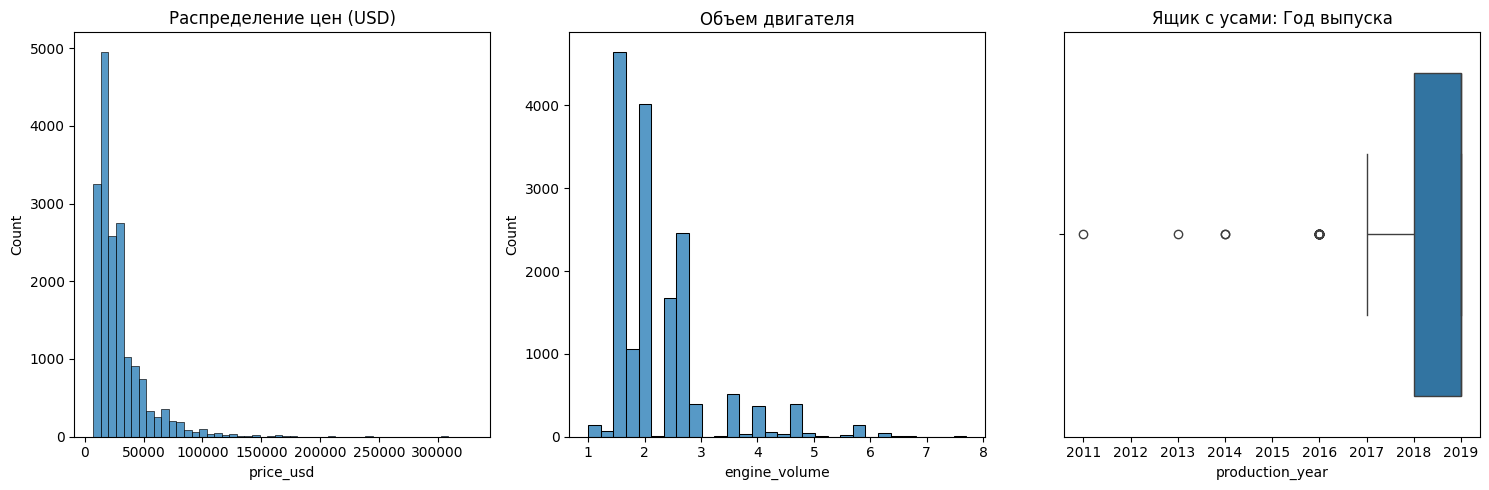

In [337]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['price_usd'], bins=50)
plt.title('Распределение цен (USD)')

plt.subplot(1, 3, 2)
sns.histplot(df['engine_volume'].dropna(), bins=30)
plt.title('Объем двигателя')


df['production_year'] = pd.to_numeric(df['production_year'], errors='coerce')
plt.subplot(1, 3, 3)
sns.boxplot(x=df['production_year'])
plt.title('Ящик с усами: Год выпуска')

plt.tight_layout()
plt.show()


In [346]:
price_limit = df['price_usd'].quantile(0.99)

good_df = df.query('price_usd <= @price_limit and production_year >= 2017').copy()

print(f"Удалено объектов: {len(df) - len(good_df)}")
print(f"Новый максимум цены: {good_df['price_usd'].max()}")
print((780 /len(df)) * 100)


Удалено объектов: 780
Новый максимум цены: 110364.3925
4.338636110802092


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17978 entries, 0 to 39951
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   brand              17978 non-null  category      
 1   model              17978 non-null  category      
 2   production_year    17397 non-null  float64       
 3   country_of_origin  17978 non-null  category      
 4   fuel_type          16712 non-null  category      
 5   engine_volume      16157 non-null  float64       
 6   transmission       13318 non-null  category      
 7   drive_type         13454 non-null  category      
 8   region             17978 non-null  category      
 9   dealer_name        17978 non-null  category      
 10  quantity           17972 non-null  Int32         
 11  price_usd          17978 non-null  float64       
 12  total_sale_usd     17978 non-null  float64       
 13  area               17978 non-null  category      
 14  segment_201

In [348]:
# 1. Анализ брендов: количество и доля рынка в деньгах
brand_stats = df.groupby('brand', observed=True).agg({
    'price_usd': ['count', 'median', 'sum'] # если у тебя стандартный пандас, колонки будут мультииндексом
}).reset_index() # если у тебя стандартный пандас, колонки будут мультииндексом
# Упростим для вывода:
brand_stats = df.groupby('brand', observed=True)['price_usd'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)
print("--- ТОП-10 Брендов (Кол-во и медианная цена) ---")
print(brand_stats)

# 2. Регионы: где активнее всего покупают
region_stats = df.groupby('region', observed=True)['price_usd'].count().sort_values(ascending=False)
print("\n--- Продажи по регионам (кол-во сделок) ---")
print(region_stats)

# 3. Топливо и КПП: технологический портрет рынка
fuel_stats = df['fuel_type'].value_counts(normalize=True) * 100
trans_stats = df['transmission'].value_counts(normalize=True) * 100

print("\n--- Структура рынка по топливу (%) ---")
print(fuel_stats)
print("\n--- Структура рынка по КПП (%) ---")
print(trans_stats)


--- ТОП-10 Брендов (Кол-во и медианная цена) ---
         count       median
brand                      
Hyundai   4017  20762.40001
Toyota    3134  33118.42802
Lada      1956  11600.00000
GAZ       1139  16955.69493
Nissan    1021  20553.44696
Kia        823  20700.00000
UAZ        732  14068.71940
Renault    595  12635.54129
Lexus      533  50414.54479
Jac        467  14695.79601

--- Продажи по регионам (кол-во сделок) ---
region
Алматы              3879
Нур-Султан          3075
Костанай            1213
Караганда           1194
Шымкент             1164
Атырау              1110
Уральск              903
Актобе               883
Усть-Каменогорск     826
Павлодар             784
Актау                755
Петропавловск        417
Кызылорда            378
Кокшетау             342
Экспорт              301
Семей                223
Талдыкорган          207
Тараз                167
Экибастуз             88
Каскелен              38
Туркестан             13
Рудный                11
Сарыагаш     

In [360]:
# 1. ТОП-10 самых продаваемых моделей (по количеству сделок)
model_popular = df.groupby(['brand', 'model'], observed=True)['price_usd'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)

# 2. ТОП-10 самых дорогих моделей (среди тех, что продавались хотя бы 10 раз, чтобы исключить штучные суперкары)
model_expensive = (
    df.groupby(['brand', 'model'], observed=True)['price_usd']
    .agg(['count', 'median'])
    .query('count > 10')
    .sort_values(by='median', ascending=False)
    .head(10)
)

print("--- ТОП-10 самых популярных моделей ---")
print(model_popular)
print("\n--- ТОП-10 самых дорогих моделей (от 10 продаж) ---")
print(model_expensive)

--- ТОП-10 самых популярных моделей ---
                  count       median
brand   model                       
Hyundai Tucson     1129  26173.22037
Toyota  Camry       948  30850.74908
Hyundai Accent      915  16684.35013
        Creta       827  19530.66388
        Elantra     636  19867.37401
Lada    Vesta       621  11600.00000
Toyota  LC Prado    587  46923.07692
GAZ     3302        583  15683.91426
Lada    Granta      459   7100.00000
Toyota  RAV4        424  26949.60212

--- ТОП-10 самых дорогих моделей (от 10 продаж) ---
                           count         median
brand         model                            
Mercedes-Benz G-Class         28  163070.420100
Land Rover    Range Rover     74  137511.797650
Porsche       Cayenne         28  100705.000000
Lexus         LX             134   98116.965750
BMW           X7              30   94306.877800
Audi          Q8              17   85092.000000
Infiniti      QX80            22   84508.491865
Cadillac      Escalade        3

In [349]:
# Создадим колонки месяца и года продажи
df['sale_month'] = df['sale_date'].dt.month
df['sale_year'] = df['sale_date'].dt.year

# 1. Динамика количества продаж по месяцам
monthly_sales = df.groupby('sale_month')['price_usd'].count()

# 2. Изменение средней цены по месяцам
monthly_price = df.groupby('sale_month')['price_usd'].median()

print("--- Продажи по месяцам (кол-во) ---")
print(monthly_sales)
print("\n--- Медианная цена по месяцам ---")
print(monthly_price)

# Посмотрим, за какие годы у нас данные
print("\n--- Данные за годы ---")
print(df['sale_year'].value_counts())


--- Продажи по месяцам (кол-во) ---
sale_month
1    1664
2    1679
3    1922
4    2337
5    2138
6    2088
7    2141
8    2008
9    2001
Name: price_usd, dtype: int64

--- Медианная цена по месяцам ---
sale_month
1    20000.00000
2    20700.00000
3    21580.90186
4    22531.08605
5    20700.00000
6    22779.05123
7    22282.38637
8    22114.20563
9    21856.90702
Name: price_usd, dtype: float64

--- Данные за годы ---
sale_year
2019    17978
Name: count, dtype: int64


In [350]:
# 1. Извлекаем месяц и год из даты продажи
df['sale_month'] = df['sale_date'].dt.month
df['sale_year'] = df['sale_date'].dt.year

# 2. Смотрим количество сделок по месяцам
monthly_sales = df.groupby('sale_month')['price_usd'].count()

# 3. Смотрим медианную цену по месяцам (влияние сезонности)
monthly_price = df.groupby('sale_month')['price_usd'].median()

print("--- Продажи по месяцам (количество) ---")
print(monthly_sales)
print("\n--- Медианная цена по месяцам ---")
print(monthly_price)

# 4. Проверяем, за какой период данные (годы)
print("\n--- Распределение по годам ---")
print(df['sale_year'].value_counts())


--- Продажи по месяцам (количество) ---
sale_month
1    1664
2    1679
3    1922
4    2337
5    2138
6    2088
7    2141
8    2008
9    2001
Name: price_usd, dtype: int64

--- Медианная цена по месяцам ---
sale_month
1    20000.00000
2    20700.00000
3    21580.90186
4    22531.08605
5    20700.00000
6    22779.05123
7    22282.38637
8    22114.20563
9    21856.90702
Name: price_usd, dtype: float64

--- Распределение по годам ---
sale_year
2019    17978
Name: count, dtype: int64


<h1 align=center>Анализ рыночной позиции и эффективности автоцентра «Меркур Авто».</h1>

In [364]:

# ================================
# 1. Выделяем Mercur Auto как сеть
# ================================

# приводим к нижнему регистру для поиска
df['dealer_name_norm'] = (
    df['dealer_name']
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

# Mercur Auto во всех городах
mercur_mask = df['dealer_name_norm'].str.contains('mercur')
df_mercur = df[mercur_mask].copy()
df_market = df.copy()

print(f"Продаж Mercur Auto: {len(df_mercur)}")
print(f"Продаж рынок всего: {len(df_market)}")

# ================================
# 2. Общие метрики
# ================================

def base_metrics(data):
    return pd.Series({
        'sales_count': data.shape[0],
        'total_units': data['quantity'].sum(),
        'total_revenue': data['total_sale_usd'].sum(),
        'avg_price': data['price_usd'].mean()
    })

metrics = pd.concat(
    [
        base_metrics(df_market),
        base_metrics(df_mercur)
    ],
    axis=1
)

metrics.columns = ['Market', 'Mercur Auto']
metrics.loc['market_share_%'] = (
    metrics.loc['sales_count', 'Mercur Auto']
    / metrics.loc['sales_count', 'Market'] * 100
)

metrics

# ================================
# 3. Доля рынка по брендам
# ================================

brand_market = (
    df_market
    .groupby('brand', observed=True)['quantity']
    .sum()
)

brand_mercur = (
    df_mercur
    .groupby('brand', observed=True)['quantity']
    .sum()
)

brand_share = (
    pd.concat([brand_market, brand_mercur], axis=1, keys=['market', 'mercur'])
    .fillna(0)
)

brand_share['share_%'] = brand_share['mercur'] / brand_share['market'] * 100
brand_share = brand_share.sort_values('share_%', ascending=False)

brand_share.head(10)

# ================================
# 4. Доля рынка по регионам
# ================================

region_market = (
    df_market
    .groupby('region', observed=True)['quantity']
    .sum()
)

region_mercur = (
    df_mercur
    .groupby('region', observed=True)['quantity']
    .sum()
)

region_share = (
    pd.concat([region_market, region_mercur], axis=1, keys=['market', 'mercur'])
    .fillna(0)
)

region_share['share_%'] = region_share['mercur'] / region_share['market'] * 100
region_share = region_share.sort_values('share_%', ascending=False)

region_share.head(10)

# ================================
# 5. Доля рынка по сегментам и классам
# ================================

segment_market = (
    df_market
    .groupby('segment_2013', observed=True)['quantity']
    .sum()
)

segment_mercur = (
    df_mercur
    .groupby('segment_2013', observed=True)['quantity']
    .sum()
)

segment_share = (
    pd.concat([segment_market, segment_mercur], axis=1, keys=['market', 'mercur'])
    .fillna(0)
)

segment_share['share_%'] = segment_share['mercur'] / segment_share['market'] * 100
segment_share = segment_share.sort_values('share_%', ascending=False)

segment_share

# ================================
# 6. Сравнение среднего чека
# ================================

price_compare = pd.DataFrame({
    'market_avg_price': df_market['price_usd'].mean(),
    'mercur_avg_price': df_mercur['price_usd'].mean(),
    'market_median_price': df_market['price_usd'].median(),
    'mercur_median_price': df_mercur['price_usd'].median()
}, index=[0])

price_compare

# ================================
# 7. Структура продаж (цены)
# ================================

bins = [0, 10000, 20000, 30000, 50000, 100000, np.inf]
labels = ['<10k', '10–20k', '20–30k', '30–50k', '50–100k', '100k+']

df_market['price_group'] = pd.cut(df_market['price_usd'], bins=bins, labels=labels)
df_mercur['price_group'] = pd.cut(df_mercur['price_usd'], bins=bins, labels=labels)

price_structure = pd.DataFrame({
    'market_%': df_market['price_group'].value_counts(normalize=True) * 100,
    'mercur_%': df_mercur['price_group'].value_counts(normalize=True) * 100
}).fillna(0)

price_structure

# ================================
# 8. Тип топлива и трансмиссии
# ================================

fuel_structure = pd.DataFrame({
    'market_%': df_market['fuel_type'].value_counts(normalize=True) * 100,
    'mercur_%': df_mercur['fuel_type'].value_counts(normalize=True) * 100
}).fillna(0)

transmission_structure = pd.DataFrame({
    'market_%': df_market['transmission'].value_counts(normalize=True) * 100,
    'mercur_%': df_mercur['transmission'].value_counts(normalize=True) * 100
}).fillna(0)

fuel_structure, transmission_structure

# ================================
# 9. Краткие выводы (для текста)
# ================================

summary = {
    "market_share_%": round(metrics.loc['market_share_%', 'Mercur Auto'], 2),
    "avg_price_diff_%": round(
        (df_mercur['price_usd'].mean() / df_market['price_usd'].mean() - 1) * 100,
        2
    ),
    "top_brand_share": brand_share.head(3),
    "top_region_share": region_share.head(3)
}

summary


Продаж Mercur Auto: 315
Продаж рынок всего: 17978


{'market_share_%': np.float64(1.75),
 'avg_price_diff_%': np.float64(9.02),
 'top_brand_share':             market  mercur    share_%
 brand                                
 Audi            46      44  95.652174
 Volkswagen    1024     649  63.378906
 ANKAI           11       0        0.0,
 'top_region_share':             market  mercur   share_%
 region                              
 Алматы        6637     424  6.388429
 Атырау        2341     120  5.126015
 Нур-Султан    4968     149  2.999195}

Короткий **вывод по анализу рынка и позиции «Mercur Auto»** на основе полученных метрик:

---

### Общая позиция на рынке

* **Доля рынка Mercur Auto — 1,75%**, что указывает на **нишевое присутствие**, а не на массового игрока.
* Компания заметна, но **не формирует рынок** и не оказывает существенного влияния на общерыночные объёмы.

---

### Ценовое позиционирование

* **Средний чек Mercur Auto выше рынка на ~9%**.
* Это говорит о **премиальном или квази-премиальном позиционировании**, либо о фокусе на более дорогие комплектации и бренды.
* Риск: ограничение спроса в чувствительных к цене сегментах.

---

### Брендовая структура

* **Audi**: Mercur Auto контролирует **~96% продаж бренда** в датасете → **сильная специализация и почти монопольная позиция**.
* **Volkswagen**: доля **~63%** — также очень сильное присутствие.
* **ANKAI**: отсутствие продаж → бренд вне фокуса компании.

**Вывод:** Mercur Auto — **бренд-специализированный дилер**, а не мультибрендовый игрок широкого профиля.

---

### Региональное присутствие

* **Алматы** — крупнейший рынок, но доля Mercur Auto всего **~6,4%**.
* **Атырау** — ~5,1%.
* **Нур-Султан** — ~3%.

**Вывод:** даже в ключевых регионах компания **не доминирует**, присутствие скорее точечное.

---

### Итоговая оценка позиционирования

**Сильные стороны**

* Сильные позиции по отдельным брендам (Audi, VW)
* Более высокий средний чек
* Чёткий фокус и специализация

**Слабые стороны**

* Низкая общая доля рынка
* Слабое региональное покрытие
* Ограниченная диверсификация брендов

**Общий вывод:**
Mercur Auto — это **специализированный дилер с премиальным уклоном**, а не массовый игрок. Потенциал роста — в расширении регионального охвата или масштабировании успешных брендовых направлений.

Если нужно — следующим шагом могу:

* оформить это как **готовый текст для отчёта/курсовой**,
* или дополнить **рекомендациями по стратегии роста**,
* или визуализировать доли рынка графически.


In [351]:
# Финальная очистка
df_final = df.copy()
df_final.loc[df_final['fuel_type'] == 'E', 'engine_volume'] = 0
price_limit = df_final['price_usd'].quantile(0.99)
# Убираем экстремальные цены и пустые года, если они есть
df_final = df_final.query('price_usd <= @price_limit').dropna(subset=['production_year'])

# Сохранение
df_final.to_csv('cleaned_cars_2019.csv', index=False, encoding='utf-8-sig')
print("CSV-файл готов!")


CSV-файл готов!
